In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#Univariate Analysis

(array([4543.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

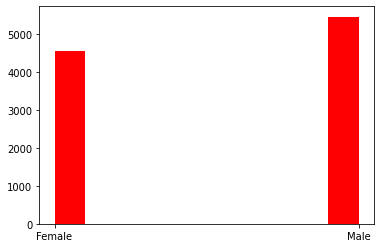

In [4]:
plt.hist(df['Gender'],color='r')

Text(0.5, 1.0, 'Visual')

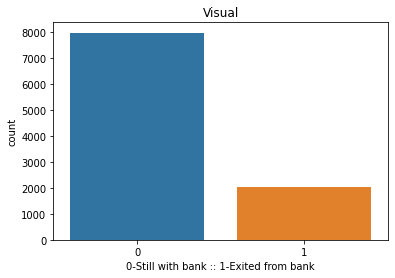

In [5]:
sns.countplot(x='Exited',data=df)
plt.xlabel("0-Still with bank :: 1-Exited from bank")
plt.ylabel("count")
plt.title("Visual")

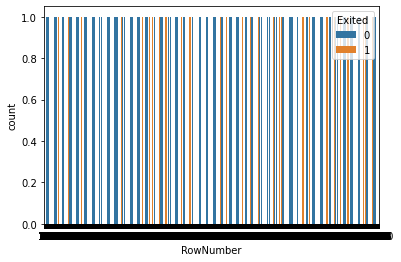

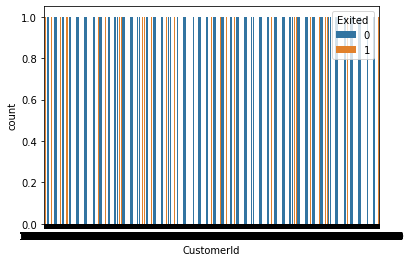

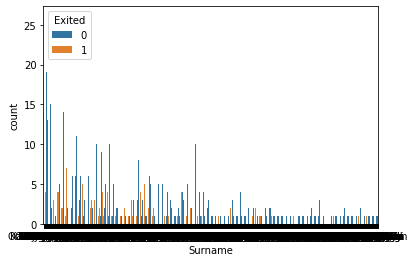

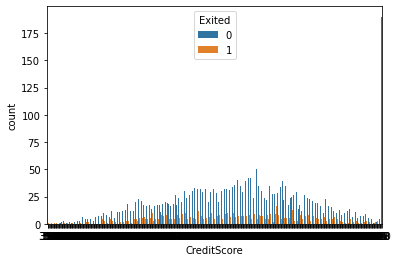

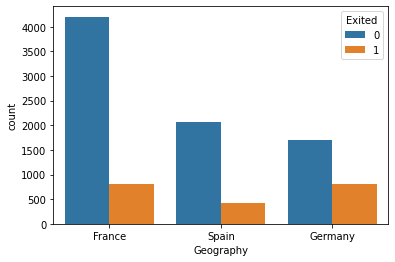

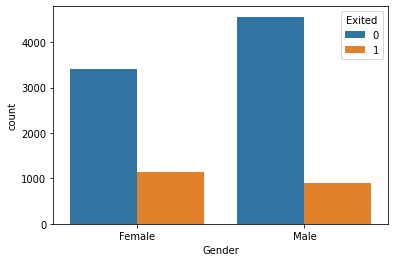

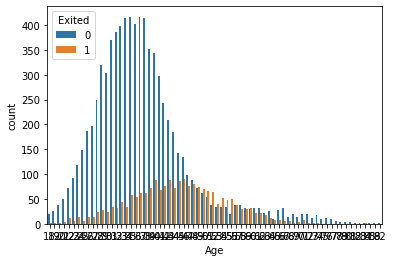

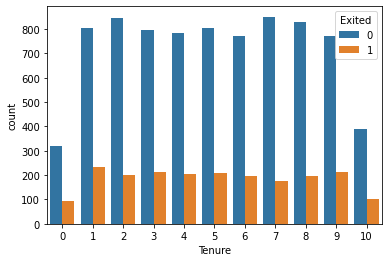

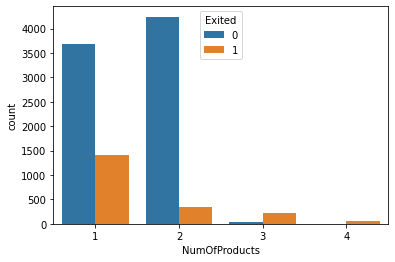

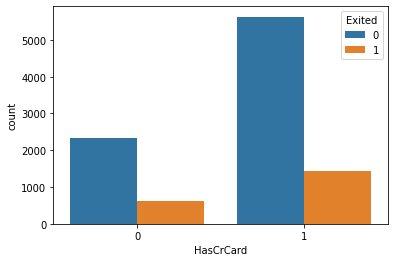

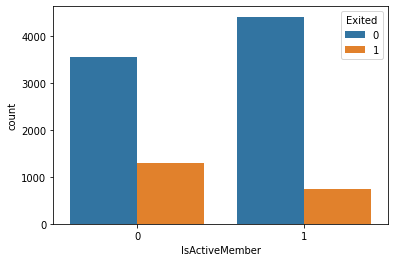

In [6]:
for i,predictor in enumerate(df.drop(columns=['Exited','EstimatedSalary','Balance'])):
    plt.figure(i)
    sns.countplot(data=df,x=predictor, hue='Exited')

#Bivariate Analysis

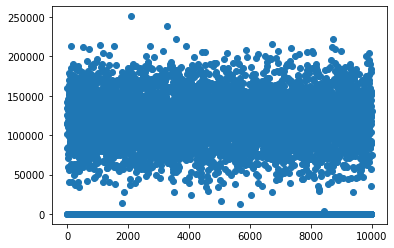

In [7]:
plt.scatter(df.index,df['Balance'])

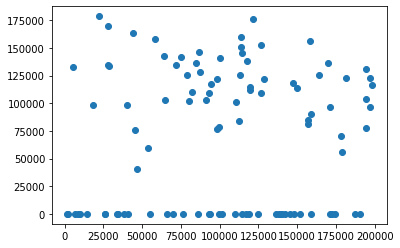

In [8]:
plt.scatter(df['EstimatedSalary'].head(100),df['Balance'].head(100))

#Multivariate Analysis

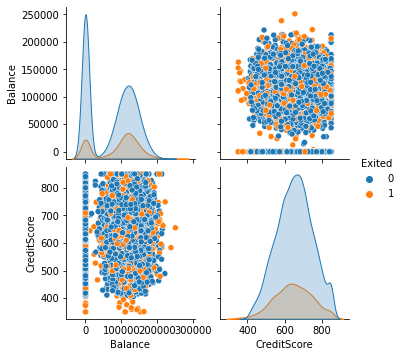

In [9]:
sns.pairplot(data=df[['Balance','CreditScore','Exited']],hue='Exited')

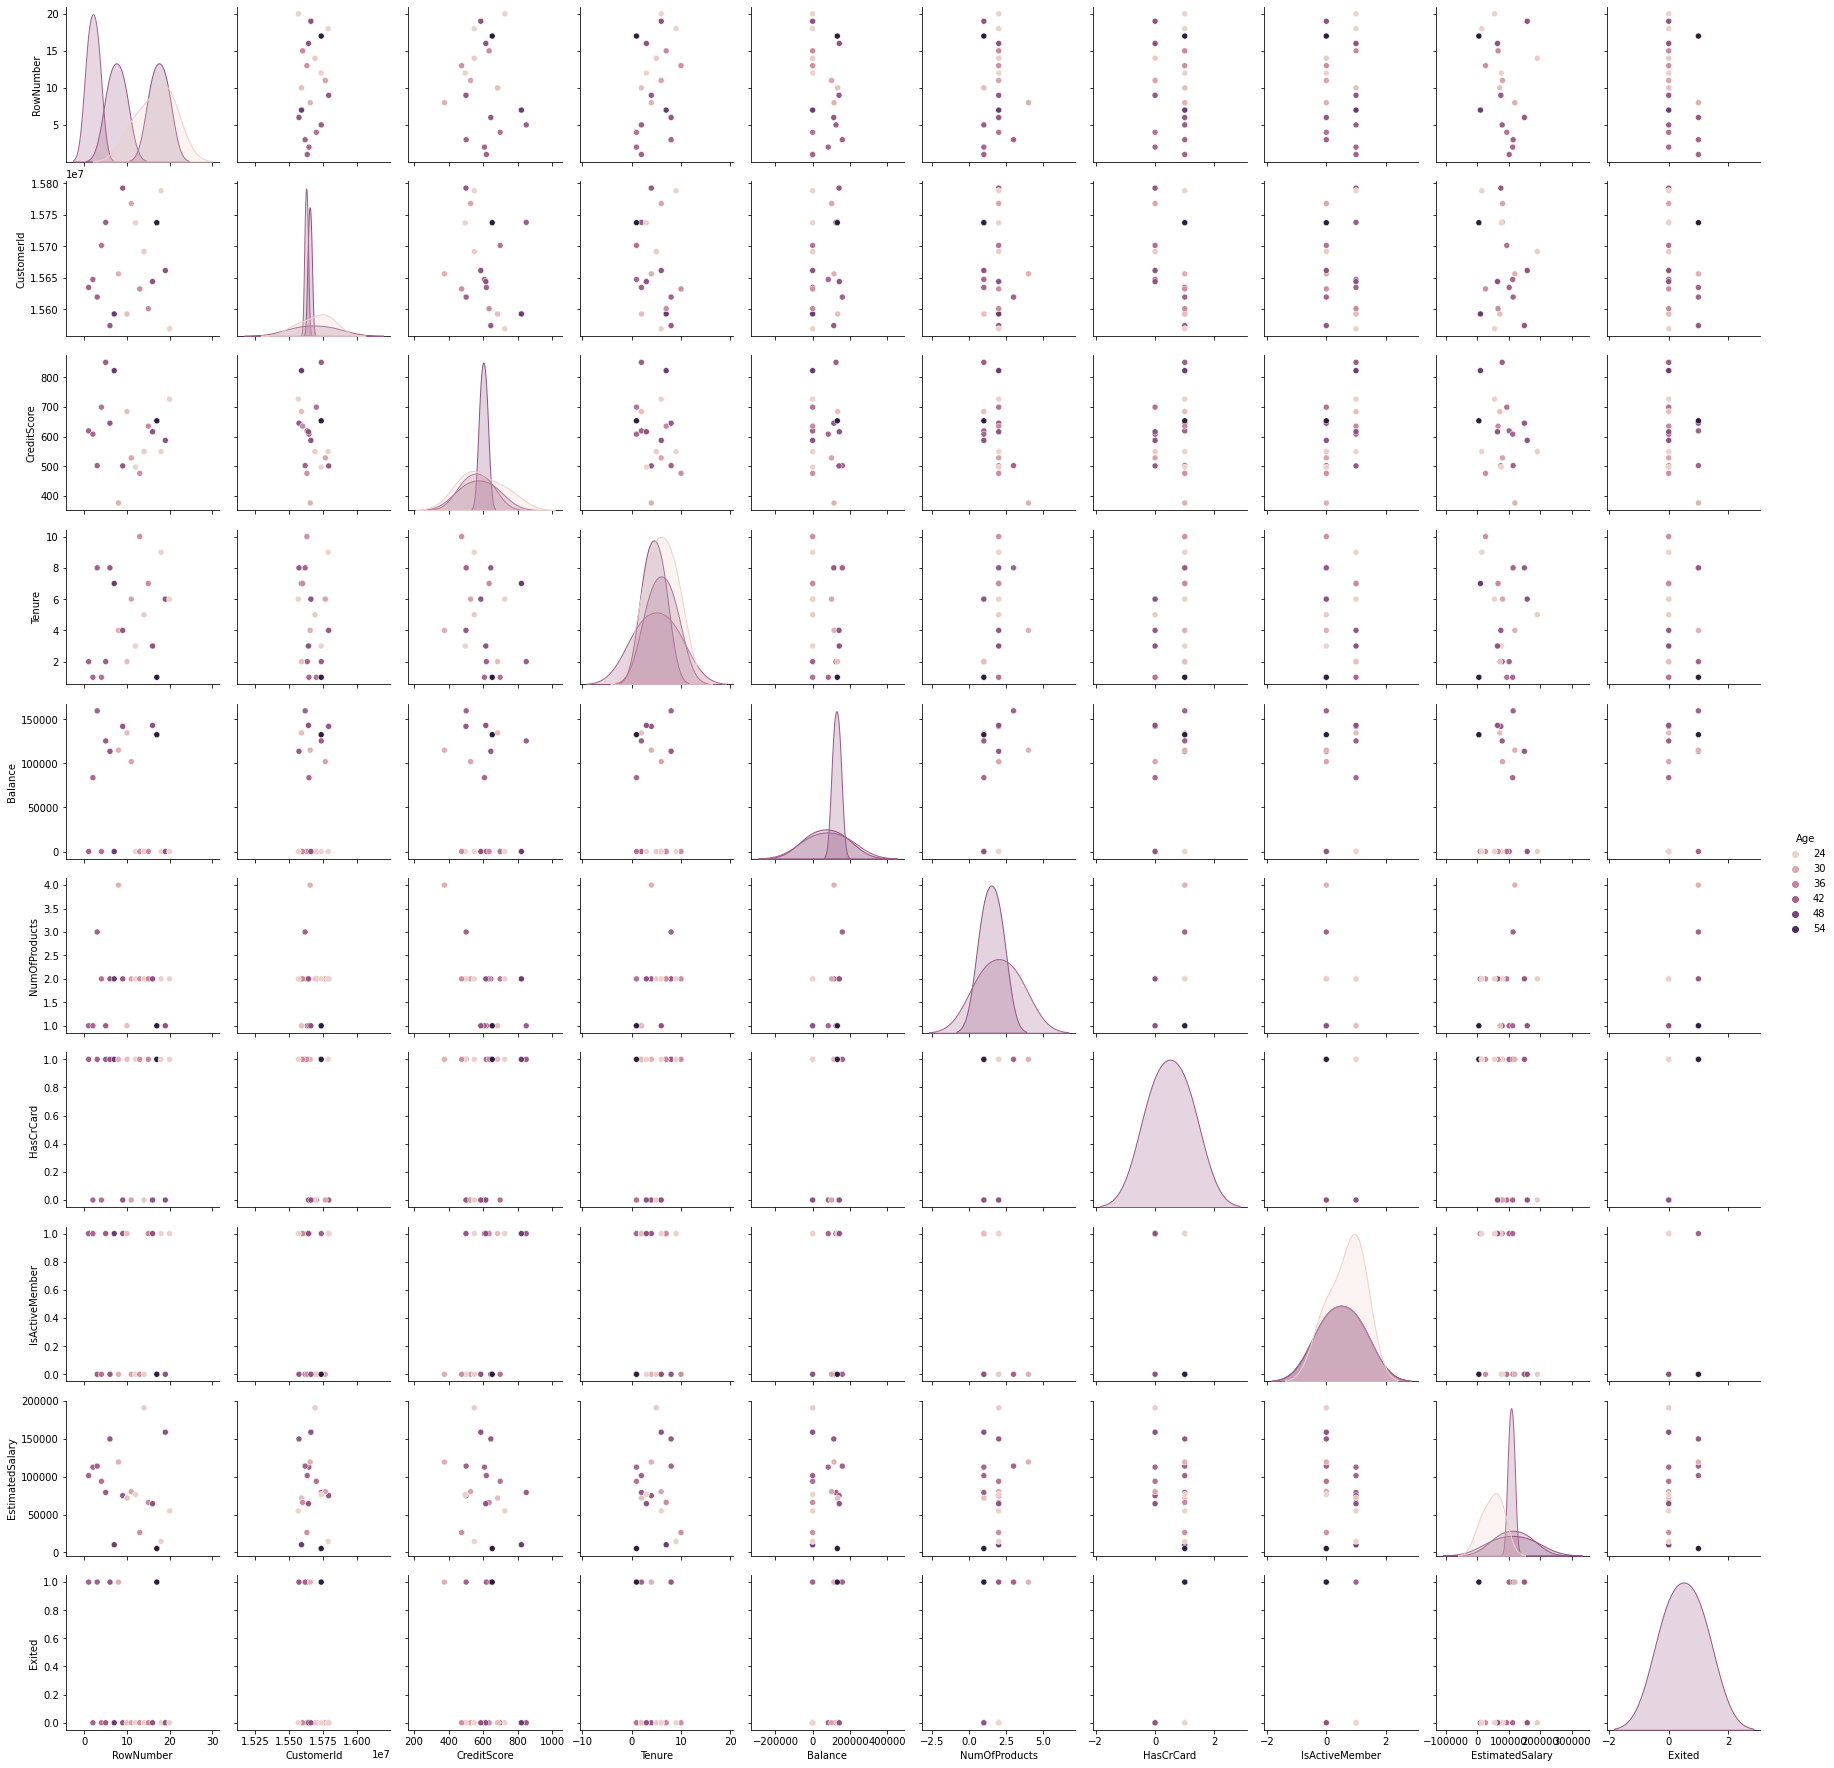

In [10]:
sns.pairplot(df.head(20),hue='Age')

#Descriptive statistics

In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#Handle the missing values

In [12]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [13]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#Finding and replacing the outliers

In [14]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [20]:
df['CreditScore'].describe()

count    6342.000000
mean      651.170609
std        66.378205
min       522.000000
25%       599.000000
50%       652.000000
75%       704.000000
max       777.000000
Name: CreditScore, dtype: float64

In [21]:
list=['Age','CreditScore']
for i in list:
    percent_min=df[i].quantile(0.1)
    percent_90=df[i].quantile(0.9)
    df=df[(df[i]<percent_90) & (df[i]>percent_min)]

In [22]:
df['Age'].describe()

count    3906.000000
mean       37.727599
std         4.264320
min        31.000000
25%        34.000000
50%        37.000000
75%        41.000000
max        46.000000
Name: Age, dtype: float64

In [23]:
df['CreditScore'].describe()

count    3906.000000
mean      651.540451
std        49.534308
min       559.000000
25%       611.000000
50%       652.000000
75%       693.000000
max       742.000000
Name: CreditScore, dtype: float64

#Check for Categorical columns and perform encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df['Geography']=le.fit_transform(df['Geography'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
5,6,15574012,Chu,645,2,Male,44,8,113755.78,2,1,0,149756.71,1
14,15,15600882,Scott,635,2,Female,35,7,0.00,2,1,1,65951.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,15696175,Echezonachukwu,602,1,Male,35,7,90602.42,2,1,1,51695.41,0
9985,9986,15586914,Nepean,659,0,Male,36,6,123841.49,2,1,0,96833.00,0
9990,9991,15798964,Nkemakonam,714,1,Male,33,3,35016.60,1,1,0,53667.08,0
9992,9993,15657105,Chukwualuka,726,2,Male,36,2,0.00,1,1,0,195192.40,0


In [26]:
df['Gender']=le.fit_transform(df['Gender'])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71,1
14,15,15600882,Scott,635,2,0,35,7,0.00,2,1,1,65951.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,15696175,Echezonachukwu,602,1,1,35,7,90602.42,2,1,1,51695.41,0
9985,9986,15586914,Nepean,659,0,1,36,6,123841.49,2,1,0,96833.00,0
9990,9991,15798964,Nkemakonam,714,1,1,33,3,35016.60,1,1,0,53667.08,0
9992,9993,15657105,Chukwualuka,726,2,1,36,2,0.00,1,1,0,195192.40,0


#Split the data into dependent and independent variables

In [27]:
df.shape

(3906, 14)

In [28]:
x=df.iloc[:,:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63
5,6,15574012,Chu,645,2,1,44,8,113755.78,2,1,0,149756.71
14,15,15600882,Scott,635,2,0,35,7,0.00,2,1,1,65951.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,15696175,Echezonachukwu,602,1,1,35,7,90602.42,2,1,1,51695.41
9985,9986,15586914,Nepean,659,0,1,36,6,123841.49,2,1,0,96833.00
9990,9991,15798964,Nkemakonam,714,1,1,33,3,35016.60,1,1,0,53667.08
9992,9993,15657105,Chukwualuka,726,2,1,36,2,0.00,1,1,0,195192.40


In [29]:
y=df.iloc[:,13]
y

0       1
1       0
3       0
5       1
14      0
       ..
9984    0
9985    0
9990    0
9992    0
9997    1
Name: Exited, Length: 3906, dtype: int64

#Scale the independent variables

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
x=sc.fit_transform(x)

#Split the data into training and testing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [37]:
X_train.shape

(2734, 13)

In [38]:
X_test.shape

(1172, 13)

In [39]:
Y_train.shape

(2734,)

In [40]:
Y_test.shape

(1172,)